In [13]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
googledata = pd.read_csv(r'C:\Users\N\Downloads\GoogleAppRating-DataAnalysis-master\GoogleAppRating-DataAnalysis-master\googleplaystore.csv')
#to open the csv file

In [15]:
googledata.head(5)
#print the 1st 5 data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
type(googledata)

pandas.core.frame.DataFrame

In [17]:
#to verify the number of rows and cloumns 
googledata.shape

(10841, 13)

In [18]:
#Summary statistics
googledata.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


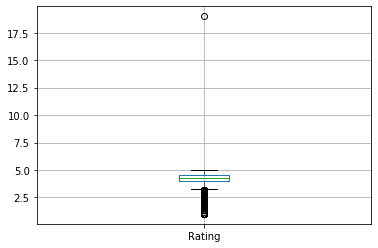

In [19]:
#Visualise outlier
googledata.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D21B757208>]],
      dtype=object)

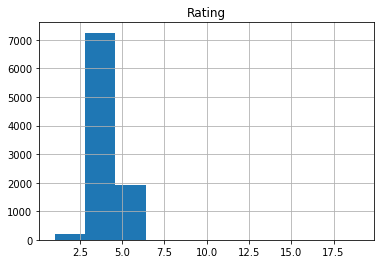

In [20]:
googledata.hist()

In [21]:
googledata.info()
# there are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [22]:
googledata.isnull().sum()
#to count the number of misssing values, rating has 1474 missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [23]:
googledata[googledata.Rating>5]
#this is the outlier

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
#to remove the outlier
googledata.drop([10472], inplace=True)

In [25]:
#to check on outlier removal
googledata[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [26]:
#Now there is no value above 5; there is no outlier
googledata[googledata.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


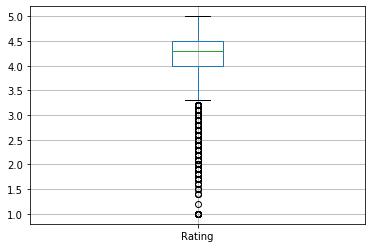

In [27]:
googledata.boxplot()
#most values are between 4 to 4.5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D21BEC9208>]],
      dtype=object)

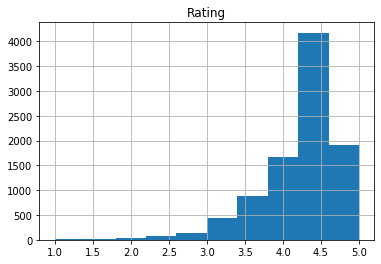

In [28]:
googledata.hist()


In [29]:
# To remove columns that are 90% empty
threshold =len(googledata)*0.1 # 10 % of the rows , rows - 10840
threshold

1084.0

In [30]:
googledata.dropna(thresh=threshold, axis=1, inplace=True)
#axis =1 coloums, axis =0 rows


In [31]:
print(googledata.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


Data Manipulation

In [32]:
#define  function i_median using pandas function
def i_median(series):
    return series.fillna(series.median())

In [33]:
#to transform the na values with median values
googledata.Rating = googledata['Rating'].transform(i_median)

In [34]:
googledata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [35]:
#modes of categorical values
print(googledata ['Type'].mode())
print(googledata ['Current Ver'].mode())
print(googledata ['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [36]:
#Fill the missing categorical values
googledata ['Type'].fillna(str(googledata['Type'].mode().values[0]),inplace=True)
googledata ['Current Ver'].fillna(str(googledata['Current Ver'].mode().values[0]),inplace=True)
googledata ['Android Ver'].fillna(str(googledata['Android Ver'].mode().values[0]),inplace=True)

In [37]:
#to count the number of null with mode
googledata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [38]:
googledata['Price']= googledata['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str (x))
googledata['Price']= googledata['Price'].apply(lambda x: float(x))
googledata['Reviews']= pd.to_numeric(googledata['Reviews'],errors= 'coerce')                              

In [39]:
googledata['Installs']= googledata['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str (x))
googledata['Installs']= googledata['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str (x))
googledata['Installs']= googledata['Installs'].apply(lambda x: str(x)) 

In [40]:
googledata.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [41]:
#the central limit theorum is applied to these
googledata.describe()

,Rating,Reviews,Price
count,10840.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.027368
std,0.480342,2.927761e+06,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,0.000000
50%,4.300000,2.094000e+03,0.000000
75%,4.500000,5.477550e+04,0.000000
max,5.000000,7.815831e+07,400.000000


Data Visualization

In [42]:
#based on the grouped category, it is aggregated with the mean of the rating
grp = googledata.groupby('Category')

x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.mean)
z = grp['Reviews'].agg(np.mean)
print(x)
#print(y)
#print(z)

ratingx=list(x)
print('Lowest rating across all apps', min(ratingx))
print('Highest rating across all apps',max(ratingx)) 


#Art _ and - Design - 13 apps - [4, 3, 4.3, 5, ...] <-- mean

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

In [43]:
pricex=list(y)
print('Least price across all apps', '$',min(pricex))
print('Highest price across all apps', '$',max(pricex)) 

Least price across all apps $ 0.0
Highest price across all apps $ 7.9257650273224


In [44]:
reviewx=list(z)
print('Least review value is', min(reviewx))
print('Most review value is', max(reviewx)) 

Least review value is 2515.90625
Most review value is 2107137.622739018


In [45]:
grp = googledata.groupby('Category')
y = grp['Price'].agg(np.sum)
print(y)

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

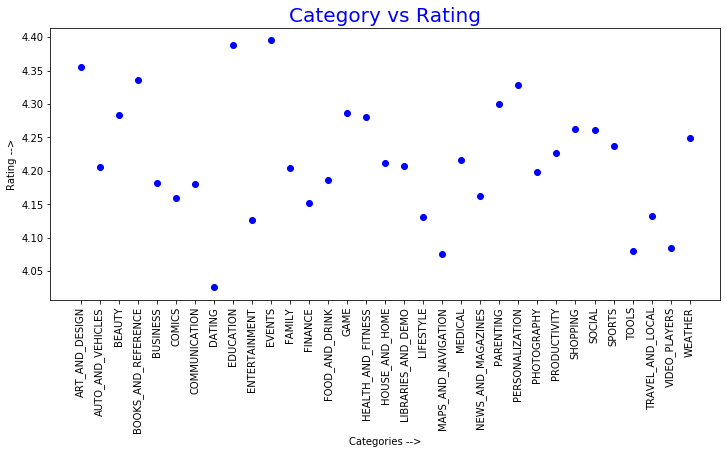

Visualization shows that ratings are scattering throughout the categories


In [65]:
#plot of rating against category of apps
plt.figure(figsize=(12,5)) # to adjust the height and width
plt.plot(x, 'ro', color='b')
plt.xticks(rotation=90)
plt.title ('Category vs Rating', color='b', fontsize=(20))
plt.xlabel('Categories -->')
plt.ylabel('Rating -->')
plt.show()

print("Visualization shows that ratings are scattering throughout the categories")

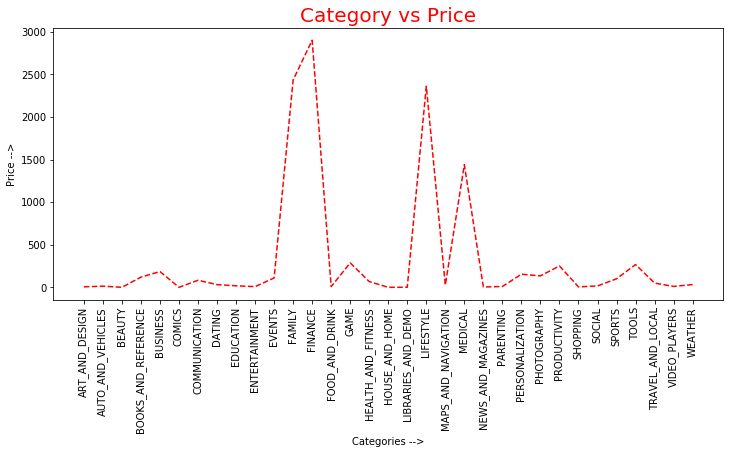

Visualization shows that the categories events, family finanace, lifestyle, medical have higher price range than others


In [66]:
#plot of rating against category of apps
plt.figure(figsize=(12,5)) # to adjust the height and width
plt.plot(y, 'r--', color='r')
plt.xticks(rotation=90)
plt.title ('Category vs Price', color='r', fontsize=(20))
plt.xlabel('Categories -->')
plt.ylabel('Price -->')
plt.show()

print("Visualization shows that the categories events, family finanace, lifestyle, medical have higher price range than others")

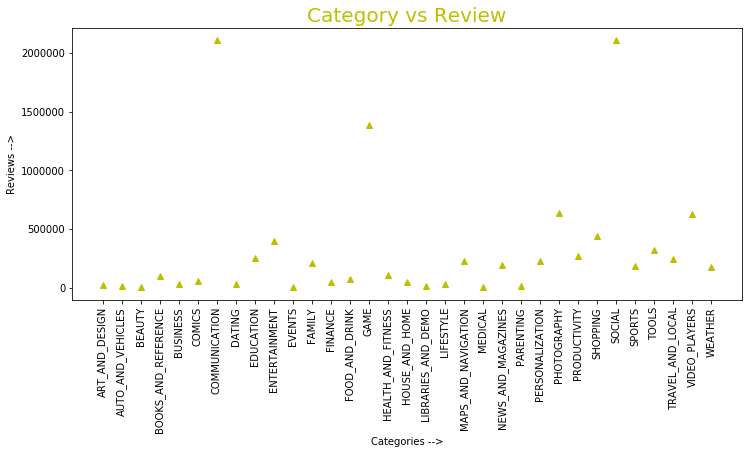

Visualization shows that communication, games and social categories have higher reviews ranging from 2M to 1.5M


In [67]:
#plot of reviews against category of apps
plt.figure(figsize=(12,5)) # to adjust the height and width
plt.plot(z, 'g^', color='y')
plt.xticks(rotation=90)
plt.title ('Category vs Review', color='y', fontsize=(20))
plt.xlabel('Categories -->')
plt.ylabel('Reviews -->')
plt.show()

print("Visualization shows that communication, games and social categories have higher reviews ranging from 2M to 1.5M")